<a href="https://colab.research.google.com/github/Junior-sls/PCA-AGLIN/blob/main/Trabalho_PCA1_dispersao_co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import numpy as np
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')
caminho_dataset1 = '/content/gdrive/My Drive/Colab Notebooks/praia_grande_calc.xlsx'
caminho_dataset2 = '/content/gdrive/My Drive/Colab Notebooks/santos_calc.xlsx'
#Localizando os devidos data set para Santos e Praia Grande

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
df_praia_grande = pd.read_excel(caminho_dataset1)
df_santos = pd.read_excel(caminho_dataset2)
#Lendo datasets individualmente

In [14]:
df_combinado = pd.concat([df_praia_grande, df_santos], ignore_index=True)
colunas_numericas = df_combinado.columns[1:]
colunas_categoricas = ['Setor']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), colunas_categoricas)])
X_preparado = preprocessor.fit_transform(df_combinado)
#Concatenando datasets, e identificando setores emissores

In [15]:
pca = PCA(n_components=1)
pca.fit(X_preparado)
X_pca = pca.transform(X_preparado)

autovalores = pca.explained_variance_
autovetores = pca.components_

indices_importantes = np.argsort(np.abs(autovetores[0]))[::-1]

indices_importantes = indices_importantes[indices_importantes < len(df_combinado.columns[1:])]

nomes_recursos_importantes = df_combinado.columns[1:][indices_importantes]

eigen_pairs = [(np.abs(autovalores[i]), autovetores[:, i]) for i in range(len(autovalores))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

top_eigenvalues = eigen_pairs[0][0]
top_eigenvectors = eigen_pairs[0][1]


print("\nMaior autovalor:")
print(top_eigenvalues)
print("\nMaior autovetor:")
print(top_eigenvectors)

variancia_explicada = pca.explained_variance_ratio_
print("matriz: ", X_pca)
print("Autovalores:", autovalores)
print("Autovetores:", autovetores)
print("Recursos mais importantes para o primeiro componente principal (escopo dos anos):", nomes_recursos_importantes)
print("Variância explicada por cada componente principal:", variancia_explicada)
#Aplicando PCA, como temos apenas um tipo de gás e apenas uma forma de emissão, 1 componente é o bastante.


Maior autovalor:
19.55169040112332

Maior autovetor:
[0.24037755]
matriz:  [[-2.25366852]
 [-2.10644783]
 [-2.01260562]
 [ 2.63053227]
 [-2.2396626 ]
 [-1.98086666]
 [-2.17221831]
 [10.13493727]]
Autovalores: [19.5516904]
Autovetores: [[ 0.24037755  0.24044478  0.24089236  0.24043032  0.24060154  0.24133363
   0.24162087  0.24172931  0.24172266  0.24126337  0.24134449  0.2416057
   0.24138941  0.24087245  0.24115814  0.24121029  0.24110879 -0.02986453
  -0.030577   -0.03283115  0.09327268]]
Recursos mais importantes para o primeiro componente principal (escopo dos anos): Index(['2014', '2015', '2013', '2018', '2019', '2017', '2012', '2016', '2022',
       '2021', '2023', '2009', '2020', '2011', '2008', '2010', '2007'],
      dtype='object')
Variância explicada por cada componente principal: [0.96381572]


In [16]:
setor_mapping = {setor: i for i, setor in enumerate(df_combinado['Setor'].unique())}

y_numeric = df_combinado['Setor'].map(setor_mapping).to_numpy()

print(X_pca[:, 0].shape)
print(y_numeric.shape)
print(X_pca[:, 0].dtype)
print(y_numeric.dtype)
print(df_combinado['Setor'].unique())
#Identificando setores

(8,)
(8,)
float64
int64
['Publico' 'Comercial' 'Ferroviario' 'Rodoviario']


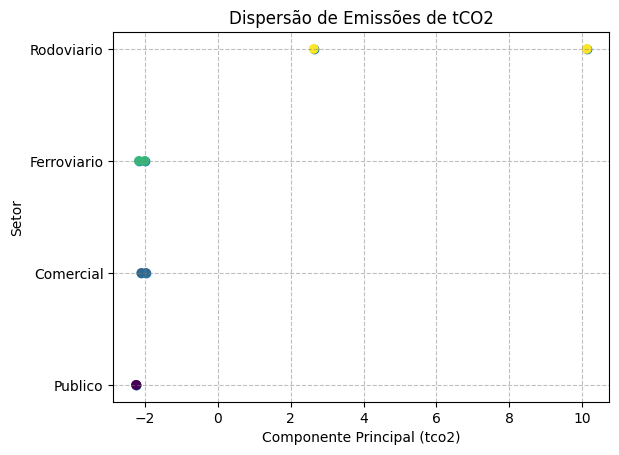

O setor com maior dispersão entre as duas cidades, é o setor Rodoviário


In [17]:
plt.scatter(X_pca, df_combinado['Setor'])
setor_mapping = {setor: i for i, setor in enumerate(df_combinado['Setor'].unique())}
colors = [setor_mapping[setor] for setor in df_combinado['Setor']]
plt.scatter(X_pca[:, 0], df_combinado['Setor'], c=colors)

# Adicionar rótulos e título
plt.xlabel('Componente Principal (tco2)')
plt.ylabel('Setor')
plt.title('Dispersão de Emissões de tCO2')

#Display do Gráfico
plt.grid(True, which='major', axis='both', linestyle='--', color='gray', alpha=0.5)
plt.show()
print("O setor com maior dispersão entre as duas cidades, é o setor Rodoviário")
#Gráfico de dispersão

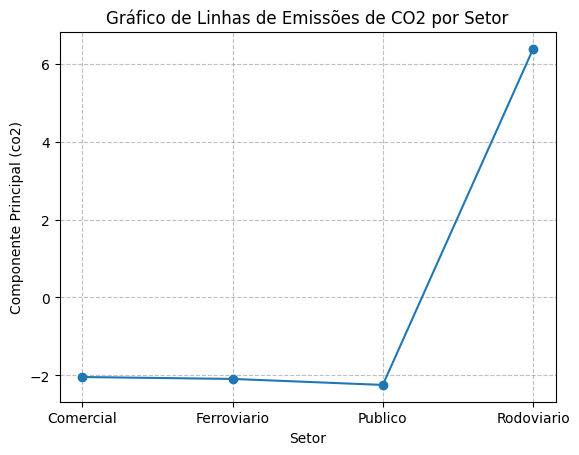

O setor com maior dispersão entre as duas cidades, é o setor Rodoviário


In [19]:
df_combinado['Componente Principal'] = X_pca[:, 0]
df_grouped = df_combinado.groupby('Setor')['Componente Principal'].mean().reset_index()

#Gráfico de linhas
plt.plot(df_grouped['Setor'], df_grouped['Componente Principal'], marker='o')

# Adicionar rótulos e título
plt.xlabel('Setor')
plt.ylabel('Componente Principal (co2)')
plt.title('Gráfico de Linhas de Emissões de CO2 por Setor')

# Display do Gráfico
plt.grid(True, which='major', axis='both', linestyle='--', color='gray', alpha=0.5)
plt.show()
print("O setor com maior dispersão entre as duas cidades, é o setor Rodoviário")
#Gráfico de linhas